In [1]:
#Resouces
# https://towardsdatascience.com/speech-emotion-recognition-with-convolution-neural-network-1e6bb7130ce3
# http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/
#https://towardsdatascience.com/building-a-vocal-emotion-sensor-with-deep-learning-bedd3de8a4a9
#https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer
# https://medium.com/x8-the-ai-community/audio-classification-using-cnn-coding-example-f9cbd272269e > ideas para el folder
# https://towardsdatascience.com/building-a-vocal-emotion-sensor-with-deep-learning-bedd3de8a4a9
# https://towardsdatascience.com/speech-emotion-recognition-with-convolution-neural-network-1e6bb7130ce3

#Leer
#https://musicinformationretrieval.com/mfcc.html
#https://medium.com/@jonathan_hui/speech-recognition-feature-extraction-mfcc-plp-5455f5a69dd9
#https://medium.com/@jonathan_hui/speech-recognition-phonetics-d761ea1710c0

### Data
https://zenodo.org/record/1188976#.XuBFFkX0nD5
https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF


In [2]:
import librosa
import librosa.display
import numpy as np

import os
import sys
import glob
import numpy as np
import librosa
from scipy.io import wavfile

import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

C:\Users\diego\Anaconda3\envs\emotion_capstone\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\diego\Anaconda3\envs\emotion_capstone\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implem

In [3]:
from keras import regularizers

In [4]:
import os

# Read Files
Work on each dataset

## Read RawData

In [5]:
rawdata_list = os.listdir('RawData/')

In [6]:
print(rawdata_list)

['03-01-01-01-01-01-01.wav', '03-01-01-01-01-01-03.wav', '03-01-01-01-01-01-04.wav', '03-01-01-01-01-01-05.wav', '03-01-01-01-01-01-06.wav', '03-01-01-01-01-01-07.wav', '03-01-01-01-01-01-08.wav', '03-01-01-01-01-01-09.wav', '03-01-01-01-01-01-10.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-01-02-03.wav', '03-01-01-01-01-02-04.wav', '03-01-01-01-01-02-05.wav', '03-01-01-01-01-02-06.wav', '03-01-01-01-01-02-07.wav', '03-01-01-01-01-02-08.wav', '03-01-01-01-01-02-09.wav', '03-01-01-01-01-02-10.wav', '03-01-01-01-02-01-01.wav', '03-01-01-01-02-01-02.wav', '03-01-01-01-02-01-03.wav', '03-01-01-01-02-01-04.wav', '03-01-01-01-02-01-05.wav', '03-01-01-01-02-01-06.wav', '03-01-01-01-02-01-07.wav', '03-01-01-01-02-01-08.wav', '03-01-01-01-02-01-09.wav', '03-01-01-01-02-01-10.wav', '03-01-01-01-02-02-01.wav', '03-01-01-01-02-02-02.wav', '03-01-01-01-02-02-03.wav', '03-01-01-01-02-02-04.wav', '03-01-01-01-02-02-05.wav', '03-01-01-01-02-02-06.wav', '03-01-01-01-02-02-07.wav', '03-01-01-01-02-02-

In [7]:
type(rawdata_list)

list

### MFCC configuration

In [8]:
#sample 
#librosa.core.load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
res_type_s = 'kaiser_best'
duration_s = None
sample_rate_s = 22050
offset_s = 0.5

#Mfcc
#librosa.feature.mfcc(y=None, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0, **kwargs)
mfcc_sample_rate = 22050
n_feat = 13
n_mfcc = 40
n_fft = 552
window = 0.4
test_shift = 0.1
duration = 2.5
axis_mfcc = 1


### RawData get emotion features

File naming convention

Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics: 

Filename identifiers 

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 02-01-06-01-02-01-12.mp4 
- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12)
- Female, as the actor ID number is even.

In [9]:
feeling_list=[]

#Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fear, 07 = disgust, 08 = surprised) 

for emotion_path in rawdata_list:
    if emotion_path.split('-')[2] == '01':
        feeling_list.append("neutral")
    elif emotion_path.split('-')[2] == '02':
        feeling_list.append("calm")
    elif emotion_path.split('-')[2] == '03':
        feeling_list.append("happy")
    elif emotion_path.split('-')[2] == '04':
        feeling_list.append("sad")
    elif emotion_path.split('-')[2] == '05':
        feeling_list.append("angry")
    elif emotion_path.split('-')[2] == '06':
        feeling_list.append("fear")
    elif emotion_path.split('-')[2] == '07':
        feeling_list.append("disgust")
    elif emotion_path.split('-')[2] == '08':
        feeling_list.append("surprised")
    else:
        feeling_list.append("unknown")
        
feeling_list

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'ca

In [10]:
feeling_list

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'calm',
 'ca

In [11]:
import pandas as pd

labels = pd.DataFrame(feeling_list)

In [12]:
labels.shape

(1170, 1)

In [13]:
labels = labels.rename({0: 'emotion'}, axis=1)

In [14]:
labels.shape

(1170, 1)

In [15]:
labels_total = pd.DataFrame(labels.groupby(['emotion']).size())
labels_total

,0
emotion,
angry,184
calm,184
disgust,80
fear,184
happy,184
neutral,90
sad,184
surprised,80


### RawData get audio features

In [16]:
# https://librosa.github.io/blog/2019/07/17/resample-on-load/

rawdata_1 = pd.DataFrame(columns=['feature'])
bookmark=0
for y in rawdata_list:
    #Change to kaiser_best & 22050 kHz
    #probar duration 3
    #offset start reading after this time
    #sr > target sampling rate
    #offset=0.5
    X, sample_rate = librosa.load('RawData/'+y, 
                                  res_type = res_type_s,
                                  duration = duration_s,
                                  sr = sample_rate_s,
                                  offset = offset_s)
    sample_rate = np.array(sample_rate)
    mfccs = librosa.feature.mfcc(   y=X, 
                                    sr = mfcc_sample_rate, 
                                    n_mfcc = n_mfcc)
    mfccs_mean = np.mean(    mfccs, 
                             axis = axis_mfcc)
    feature = mfccs_mean
    rawdata_1.loc[bookmark] = [feature]
    bookmark=bookmark+1   

In [17]:
rawdata_1.shape

(1170, 1)

In [18]:
rawdata_1.isnull().values.any()

False

In [19]:
rawdata_1

,feature
0,"[-363.3887290340994, 77.68306674809371, -11.19..."
1,"[-326.91351899556, 77.65209081609632, -14.5439..."
2,"[-359.4689911204949, 66.02038723837009, -23.72..."
3,"[-376.3948495148282, 90.08743891794771, -3.517..."
4,"[-364.30013143857167, 77.39369743958628, -35.6..."
...,...
1165,"[-387.8787240853882, 36.04284862391279, -23.39..."
1166,"[-444.31812032605995, 56.227220762642375, -19...."
1167,"[-449.0887812706918, 22.074922409049478, -20.7..."
1168,"[-438.6358679821132, 62.339500696565516, -23.9..."


In [20]:
rawdata_f = pd.DataFrame(rawdata_1['feature'].values.tolist())

In [21]:
rawdata_f.shape

(1170, 40)

In [22]:
rawdata_f

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-363.388729,77.683067,-11.194510,25.560407,-0.295472,8.327729,-9.751422,0.370547,-15.182420,-2.709384,...,-0.769595,-4.234061,-1.380629,-3.896914,-2.250014,-3.142226,-0.189935,-2.949018,-3.580094,-2.151387
1,-326.913519,77.652091,-14.543926,22.188295,-3.558177,3.815711,-18.927323,-4.888985,-4.825284,-10.366080,...,-0.491192,-3.248289,-0.211641,-0.391715,1.262371,-2.274373,-2.532293,-2.710764,-1.267864,3.150378
2,-359.468991,66.020387,-23.728110,24.097274,-16.576464,3.625497,-14.804795,-10.117932,-11.085726,-3.864725,...,0.810285,-1.222406,-0.495676,0.061849,3.767354,1.732929,1.921771,0.569572,4.458784,5.970118
3,-376.394850,90.087439,-3.517082,26.388772,3.192081,6.217067,-5.483876,-0.761739,-3.034643,0.947288,...,0.176045,-0.379812,1.013016,-0.483969,0.898350,1.470083,-0.089222,-2.444216,-1.995216,-0.317193
4,-364.300131,77.393697,-35.637314,23.511936,-12.271102,-2.599215,-17.571811,-7.613848,-10.043749,-1.571024,...,6.987080,4.832439,6.508662,4.063072,6.827801,2.736875,2.561028,-1.129000,1.742436,4.395202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,-387.878724,36.042849,-23.398797,-8.214960,-14.289668,-23.249742,-11.809285,-17.530041,-15.033613,-2.378316,...,-1.764632,0.292731,-1.533541,0.531788,-0.451748,2.527931,0.616910,4.159756,3.417406,6.516614
1166,-444.318120,56.227221,-19.693078,8.307606,2.704721,-9.908772,-18.510519,2.925992,-28.614162,-9.871051,...,1.300022,-1.831319,-0.946111,0.330284,-5.096895,2.421162,3.831172,10.906382,12.355899,16.759364
1167,-449.088781,22.074922,-20.714376,-4.052924,-12.367433,-15.099882,-16.798722,-11.333656,-25.291205,-3.070703,...,-3.059377,3.579826,-2.041474,-3.591970,-2.873591,1.988514,1.262317,-0.634169,1.035286,9.232767
1168,-438.635868,62.339501,-23.957374,6.800054,9.712691,-14.948303,-15.163799,-12.472947,-16.778817,-3.771296,...,-1.619538,1.093805,-2.499102,-0.332175,-1.323671,3.012106,6.850604,11.304347,12.714969,14.327139


In [23]:
newdf = pd.concat([rawdata_f,labels], axis=1)

In [24]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [25]:
rnewdf.shape

(1170, 41)

In [26]:
rnewdf

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-363.388729,77.683067,-11.194510,25.560407,-0.295472,8.327729,-9.751422,0.370547,-15.182420,-2.709384,...,-4.234061,-1.380629,-3.896914,-2.250014,-3.142226,-0.189935,-2.949018,-3.580094,-2.151387,neutral
1,-326.913519,77.652091,-14.543926,22.188295,-3.558177,3.815711,-18.927323,-4.888985,-4.825284,-10.366080,...,-3.248289,-0.211641,-0.391715,1.262371,-2.274373,-2.532293,-2.710764,-1.267864,3.150378,neutral
2,-359.468991,66.020387,-23.728110,24.097274,-16.576464,3.625497,-14.804795,-10.117932,-11.085726,-3.864725,...,-1.222406,-0.495676,0.061849,3.767354,1.732929,1.921771,0.569572,4.458784,5.970118,neutral
3,-376.394850,90.087439,-3.517082,26.388772,3.192081,6.217067,-5.483876,-0.761739,-3.034643,0.947288,...,-0.379812,1.013016,-0.483969,0.898350,1.470083,-0.089222,-2.444216,-1.995216,-0.317193,neutral
4,-364.300131,77.393697,-35.637314,23.511936,-12.271102,-2.599215,-17.571811,-7.613848,-10.043749,-1.571024,...,4.832439,6.508662,4.063072,6.827801,2.736875,2.561028,-1.129000,1.742436,4.395202,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,-387.878724,36.042849,-23.398797,-8.214960,-14.289668,-23.249742,-11.809285,-17.530041,-15.033613,-2.378316,...,0.292731,-1.533541,0.531788,-0.451748,2.527931,0.616910,4.159756,3.417406,6.516614,fear
1166,-444.318120,56.227221,-19.693078,8.307606,2.704721,-9.908772,-18.510519,2.925992,-28.614162,-9.871051,...,-1.831319,-0.946111,0.330284,-5.096895,2.421162,3.831172,10.906382,12.355899,16.759364,fear
1167,-449.088781,22.074922,-20.714376,-4.052924,-12.367433,-15.099882,-16.798722,-11.333656,-25.291205,-3.070703,...,3.579826,-2.041474,-3.591970,-2.873591,1.988514,1.262317,-0.634169,1.035286,9.232767,fear
1168,-438.635868,62.339501,-23.957374,6.800054,9.712691,-14.948303,-15.163799,-12.472947,-16.778817,-3.771296,...,1.093805,-2.499102,-0.332175,-1.323671,3.012106,6.850604,11.304347,12.714969,14.327139,fear


In [27]:
rnewdf.dropna(inplace=True)

In [28]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
351,-401.176761,40.388399,-47.799587,14.621850,-43.185431,5.867797,-22.586651,-12.906635,-11.655658,-9.111767,...,-0.952078,2.068140,-1.707685,3.627046,-2.661033,-0.313064,-0.416730,1.828343,1.979159,angry
82,-301.892747,95.868674,-11.458268,40.534363,-9.330877,15.444353,-10.862431,6.102333,-0.980188,3.708385,...,-0.977972,1.902699,-1.977025,2.584348,-0.160907,-2.295612,-3.892836,-2.953652,-1.189178,calm
979,-407.719163,54.587267,-20.149434,12.762218,8.965409,-14.100747,-1.792696,4.680410,-14.824195,0.241326,...,4.040218,4.703747,4.275572,0.952382,3.142994,2.182665,7.376123,10.495854,12.959307,angry
72,-351.369223,90.834157,-1.748489,30.244383,-11.684535,14.431207,-11.229159,0.153730,-4.840090,4.244757,...,-1.312756,0.814795,-1.876428,1.950741,-0.607374,-1.459702,-3.754882,-2.770236,0.212650,calm
348,-293.424697,48.372537,-45.288189,17.068676,-29.603865,6.685158,-28.981870,-5.466090,-20.983672,-10.223999,...,-4.210356,1.521929,-2.643460,1.188280,-1.002704,2.402358,1.114860,-0.746431,-2.054573,angry
313,-328.911559,51.464884,-30.139941,14.059785,-17.709255,-9.117453,-15.216748,-7.988700,-12.236216,0.458400,...,0.251139,2.569498,0.228984,3.700826,0.243026,-0.899296,-3.519273,-0.969478,1.980055,angry
241,-360.213062,47.329902,-46.851711,18.970880,-25.976755,-4.627795,-21.065882,-13.804706,-13.278869,-1.920427,...,-0.914046,2.454329,-1.495127,0.548287,0.880424,1.630253,-1.207454,1.415778,1.101358,sad
793,-526.995320,69.441283,1.381067,4.810265,-2.534847,-0.229289,-6.085260,-5.305362,-13.034756,-7.213424,...,4.198730,2.010944,1.248531,-6.743622,-4.955940,-2.708941,8.728465,14.804205,21.577556,happy
350,-304.312549,74.341518,-41.241878,32.314607,-33.738963,12.902034,-17.256362,-6.347009,-14.280837,-6.346260,...,3.125645,2.783387,-0.781042,5.048173,1.408630,3.919949,-0.153453,0.490391,2.000940,angry
991,-520.824088,35.048210,-23.660065,3.089526,-19.340591,-14.288876,-5.666389,-22.025118,-4.377741,-7.210423,...,2.237445,-3.678429,-1.334699,-2.747089,0.994010,-0.293852,-0.142331,-1.377003,1.679695,angry


In [29]:
rnewdf.isnull().values.any()

False

In [30]:
rnewdf.head(1)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
351,-401.176761,40.388399,-47.799587,14.62185,-43.185431,5.867797,-22.586651,-12.906635,-11.655658,-9.111767,...,-0.952078,2.06814,-1.707685,3.627046,-2.661033,-0.313064,-0.41673,1.828343,1.979159,angry


In [31]:
rnewdf.shape

(1170, 41)

In [32]:
# see number of emotions
rnewdf[rnewdf.columns[-1]].nunique()

8

## Read RawData 2

In [33]:
import glob, os

raw_data2_path = r"C:\Users\diego\Desktop\python\capstoneproject\_Archive\RawData2\\"

folder_list2 = os.listdir(raw_data2_path)

mylist2 = []

for folder in folder_list2:
    folder_path = raw_data2_path+folder+"\\"
    os.chdir(folder_path)
    for file in glob.glob("*.wav"):
        mylist2.append(folder_path+file)

mylist2[:10]

['C:\\Users\\diego\\Desktop\\python\\capstoneproject\\_Archive\\RawData2\\\\DC\\a01.wav',
 'C:\\Users\\diego\\Desktop\\python\\capstoneproject\\_Archive\\RawData2\\\\DC\\a02.wav',
 'C:\\Users\\diego\\Desktop\\python\\capstoneproject\\_Archive\\RawData2\\\\DC\\a03.wav',
 'C:\\Users\\diego\\Desktop\\python\\capstoneproject\\_Archive\\RawData2\\\\DC\\a04.wav',
 'C:\\Users\\diego\\Desktop\\python\\capstoneproject\\_Archive\\RawData2\\\\DC\\a05.wav',
 'C:\\Users\\diego\\Desktop\\python\\capstoneproject\\_Archive\\RawData2\\\\DC\\a06.wav',
 'C:\\Users\\diego\\Desktop\\python\\capstoneproject\\_Archive\\RawData2\\\\DC\\a07.wav',
 'C:\\Users\\diego\\Desktop\\python\\capstoneproject\\_Archive\\RawData2\\\\DC\\a08.wav',
 'C:\\Users\\diego\\Desktop\\python\\capstoneproject\\_Archive\\RawData2\\\\DC\\a09.wav',
 'C:\\Users\\diego\\Desktop\\python\\capstoneproject\\_Archive\\RawData2\\\\DC\\a10.wav']

### RawData2 Get emotion features

In [34]:
feeling_list2=[]

#'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad' and 'surprised' emotion classes respectively. 
#E.g., 'd03.wav' is the 3rd disgust sentence.  

emotion_dic = {"a":'angry', 
               "d":'disgust', 
               "f":'fear', 
               "h":'happy', 
               "n":'neutral', 
               "sa":'sad', 
               "su":'surprised'}

for file_path in mylist2:
    file = file_path.split("\\")[-1] 
    file_name = file.split(".")[0] 
    emotion = file_name[:-2]
    feeling_list2.append(emotion_dic[emotion])
    
feeling_list2

['angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'sad',
 'sad',
 'sad',
 

In [35]:
labels2 = pd.DataFrame(feeling_list2)

In [36]:
labels2

,0
0,angry
1,angry
2,angry
3,angry
4,angry
...,...
475,surprised
476,surprised
477,surprised
478,surprised


In [37]:
labels2 = labels2.rename({0: 'emotion'}, axis=1)

In [38]:
labels2.shape

(480, 1)

In [39]:
labels2

,emotion
0,angry
1,angry
2,angry
3,angry
4,angry
...,...
475,surprised
476,surprised
477,surprised
478,surprised


In [40]:
labels2_total = pd.DataFrame(labels2.groupby(['emotion']).size())
labels2_total

,0
emotion,
angry,60
disgust,60
fear,60
happy,60
neutral,120
sad,60
surprised,60


### RawData2 Get audio features

In [41]:
X, sample_rate = librosa.load(mylist2[0], res_type='kaiser_best',duration=2.5,sr=22050)
print(X)
print(sample_rate)

[0.03537439 0.05184603 0.04569934 ... 0.07744353 0.07354096 0.07513168]
22050


In [42]:
rawdata_2 = pd.DataFrame(columns=['feature'])
bookmark=0
for y in mylist2:
    #Change to kaiser_best & 22050 kHz
    #probar duration 3
    #offset start reading after this time
    #sr > target sampling rate
    #offset=0.5
    X, sample_rate = librosa.load(y, 
                                  res_type = res_type_s,
                                  duration = duration_s,
                                  sr = sample_rate_s,
                                  offset=offset_s)
    sample_rate = np.array(sample_rate)
    mfccs = librosa.feature.mfcc(   y=X, 
                                    sr = mfcc_sample_rate, 
                                    n_mfcc = n_mfcc)
    mfccs_mean = np.mean(    mfccs, 
                             axis = axis_mfcc)
    feature = mfccs_mean
    rawdata_2.loc[bookmark] = [feature]
    bookmark=bookmark+1

In [43]:
rawdata_2.shape

(480, 1)

In [44]:
rawdata_2.isnull().values.any()

False

In [45]:
rawdata_2

,feature
0,"[-296.1136824332521, 122.6839230420436, 10.934..."
1,"[-271.57243805556345, 135.20572313248255, -14...."
2,"[-294.0727952894761, 115.3507969978319, -4.506..."
3,"[-259.4706820857173, 119.47394640663695, 3.171..."
4,"[-277.5559050033729, 106.70839083004265, -5.95..."
...,...
475,"[-558.5692653486857, 115.7689672170337, 26.105..."
476,"[-544.3406078081798, 124.4687043728132, 27.991..."
477,"[-571.6468413399894, 128.79056640411395, 37.86..."
478,"[-550.3187254632857, 112.69238618205347, 25.61..."


In [46]:
rawdata_f2 = pd.DataFrame(rawdata_2['feature'].values.tolist())

In [47]:
rawdata_f2

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-296.113682,122.683923,10.934713,33.064952,11.008065,-5.751949,-29.717903,-4.582358,-1.838710,-13.856135,...,1.391235,1.428571,3.140661,2.826121,3.519548,5.488966,5.332680,6.323349,4.603278,3.567965
1,-271.572438,135.205723,-14.995012,17.759984,13.836306,-4.629487,-25.265276,3.840707,4.176106,-15.257002,...,0.952989,0.923283,1.380564,-0.263862,-1.179618,-0.597114,-1.014362,1.441815,1.012423,-1.074584
2,-294.072795,115.350797,-4.506117,27.350432,8.484182,-6.469001,-20.949582,7.580607,-1.593903,-11.445965,...,2.839139,2.861756,5.346147,7.046246,8.017657,7.900878,7.948903,5.682563,3.663721,5.148371
3,-259.470682,119.473946,3.171144,16.352999,6.264024,-4.050558,-33.253506,-8.449926,-1.746414,-14.359325,...,-1.081912,1.557839,1.741688,1.464964,1.020986,0.616583,1.818939,2.970186,4.076106,6.612680
4,-277.555905,106.708391,-5.955889,19.328300,13.169778,-5.093670,-27.418839,-3.386453,-3.646344,-16.245456,...,2.091737,2.585634,0.545647,-0.500687,1.152607,0.415041,0.713604,1.836424,3.122632,4.298752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-558.569265,115.768967,26.105368,47.305672,8.726126,0.616017,-10.325820,-1.971000,-7.987759,-14.466869,...,-0.738259,2.220578,0.093342,3.583024,4.648936,1.648355,4.927142,4.034745,3.984693,4.127856
476,-544.340608,124.468704,27.991059,38.804140,15.170438,-5.678537,-14.478756,-7.122605,-11.168477,-14.404946,...,-1.102952,0.054311,-1.015303,2.062871,5.035938,2.624516,2.891129,3.149417,1.408435,1.110583
477,-571.646841,128.790566,37.860446,28.729161,10.441860,-10.284205,-10.624240,2.562054,-10.106487,-18.967301,...,-0.765333,-0.759944,-1.682139,-1.225742,1.032983,0.638857,2.107367,4.666094,4.924048,4.791265
478,-550.318725,112.692386,25.613772,24.912418,3.826000,-1.994377,-14.216793,-4.668680,-9.081210,-14.459183,...,-1.137318,-0.925662,0.045874,1.633199,0.920964,-1.057768,2.110608,2.415688,1.922921,2.214237


In [48]:
newdf2 = pd.concat([rawdata_f2,labels2], axis=1)
newdf2

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-296.113682,122.683923,10.934713,33.064952,11.008065,-5.751949,-29.717903,-4.582358,-1.838710,-13.856135,...,1.428571,3.140661,2.826121,3.519548,5.488966,5.332680,6.323349,4.603278,3.567965,angry
1,-271.572438,135.205723,-14.995012,17.759984,13.836306,-4.629487,-25.265276,3.840707,4.176106,-15.257002,...,0.923283,1.380564,-0.263862,-1.179618,-0.597114,-1.014362,1.441815,1.012423,-1.074584,angry
2,-294.072795,115.350797,-4.506117,27.350432,8.484182,-6.469001,-20.949582,7.580607,-1.593903,-11.445965,...,2.861756,5.346147,7.046246,8.017657,7.900878,7.948903,5.682563,3.663721,5.148371,angry
3,-259.470682,119.473946,3.171144,16.352999,6.264024,-4.050558,-33.253506,-8.449926,-1.746414,-14.359325,...,1.557839,1.741688,1.464964,1.020986,0.616583,1.818939,2.970186,4.076106,6.612680,angry
4,-277.555905,106.708391,-5.955889,19.328300,13.169778,-5.093670,-27.418839,-3.386453,-3.646344,-16.245456,...,2.585634,0.545647,-0.500687,1.152607,0.415041,0.713604,1.836424,3.122632,4.298752,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-558.569265,115.768967,26.105368,47.305672,8.726126,0.616017,-10.325820,-1.971000,-7.987759,-14.466869,...,2.220578,0.093342,3.583024,4.648936,1.648355,4.927142,4.034745,3.984693,4.127856,surprised
476,-544.340608,124.468704,27.991059,38.804140,15.170438,-5.678537,-14.478756,-7.122605,-11.168477,-14.404946,...,0.054311,-1.015303,2.062871,5.035938,2.624516,2.891129,3.149417,1.408435,1.110583,surprised
477,-571.646841,128.790566,37.860446,28.729161,10.441860,-10.284205,-10.624240,2.562054,-10.106487,-18.967301,...,-0.759944,-1.682139,-1.225742,1.032983,0.638857,2.107367,4.666094,4.924048,4.791265,surprised
478,-550.318725,112.692386,25.613772,24.912418,3.826000,-1.994377,-14.216793,-4.668680,-9.081210,-14.459183,...,-0.925662,0.045874,1.633199,0.920964,-1.057768,2.110608,2.415688,1.922921,2.214237,surprised


In [49]:
rnewdf2 = newdf2.rename(index=str, columns={"0": "label"})

In [50]:
rnewdf2.shape

(480, 41)

In [51]:
rnewdf2

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-296.113682,122.683923,10.934713,33.064952,11.008065,-5.751949,-29.717903,-4.582358,-1.838710,-13.856135,...,1.428571,3.140661,2.826121,3.519548,5.488966,5.332680,6.323349,4.603278,3.567965,angry
1,-271.572438,135.205723,-14.995012,17.759984,13.836306,-4.629487,-25.265276,3.840707,4.176106,-15.257002,...,0.923283,1.380564,-0.263862,-1.179618,-0.597114,-1.014362,1.441815,1.012423,-1.074584,angry
2,-294.072795,115.350797,-4.506117,27.350432,8.484182,-6.469001,-20.949582,7.580607,-1.593903,-11.445965,...,2.861756,5.346147,7.046246,8.017657,7.900878,7.948903,5.682563,3.663721,5.148371,angry
3,-259.470682,119.473946,3.171144,16.352999,6.264024,-4.050558,-33.253506,-8.449926,-1.746414,-14.359325,...,1.557839,1.741688,1.464964,1.020986,0.616583,1.818939,2.970186,4.076106,6.612680,angry
4,-277.555905,106.708391,-5.955889,19.328300,13.169778,-5.093670,-27.418839,-3.386453,-3.646344,-16.245456,...,2.585634,0.545647,-0.500687,1.152607,0.415041,0.713604,1.836424,3.122632,4.298752,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-558.569265,115.768967,26.105368,47.305672,8.726126,0.616017,-10.325820,-1.971000,-7.987759,-14.466869,...,2.220578,0.093342,3.583024,4.648936,1.648355,4.927142,4.034745,3.984693,4.127856,surprised
476,-544.340608,124.468704,27.991059,38.804140,15.170438,-5.678537,-14.478756,-7.122605,-11.168477,-14.404946,...,0.054311,-1.015303,2.062871,5.035938,2.624516,2.891129,3.149417,1.408435,1.110583,surprised
477,-571.646841,128.790566,37.860446,28.729161,10.441860,-10.284205,-10.624240,2.562054,-10.106487,-18.967301,...,-0.759944,-1.682139,-1.225742,1.032983,0.638857,2.107367,4.666094,4.924048,4.791265,surprised
478,-550.318725,112.692386,25.613772,24.912418,3.826000,-1.994377,-14.216793,-4.668680,-9.081210,-14.459183,...,-0.925662,0.045874,1.633199,0.920964,-1.057768,2.110608,2.415688,1.922921,2.214237,surprised


In [52]:
rnewdf2.dropna(inplace=True)
rnewdf2.shape

(480, 41)

In [53]:
from sklearn.utils import shuffle
rnewdf2 = shuffle(newdf2)
rnewdf2.head(10)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
339,-313.161286,101.147099,14.955143,47.149827,2.926095,-11.153715,-0.066221,-0.686475,-15.924494,-0.340367,...,1.098432,0.143887,0.011969,0.458811,-0.183911,0.438651,0.958304,2.024167,2.072155,sad
259,-277.315405,126.163362,20.100339,12.477433,-30.338432,-13.381721,1.434059,-18.262405,-11.048976,-3.429663,...,1.786706,3.168560,3.679107,1.816942,2.663625,3.366087,4.868169,4.423722,2.897219,disgust
255,-313.378797,101.210565,21.527860,35.409422,-21.993300,-9.206571,-3.312703,-10.460995,-12.156887,-5.248155,...,3.519436,5.486954,5.773781,4.364802,2.327922,3.617965,5.229183,3.309295,2.757424,disgust
349,-204.536074,102.380565,0.506218,35.261077,-20.437056,-3.989511,-15.496501,-6.511736,-18.136505,-4.965662,...,5.116984,2.427983,0.993834,3.743027,5.051940,4.174799,2.316045,0.415130,2.933644,surprised
370,-548.447081,127.342644,12.827279,42.469445,20.020540,-3.591258,-8.810119,-0.280354,-9.565272,-10.174064,...,-1.067893,-2.452239,-2.896270,0.019059,-1.275526,1.578898,1.541215,-0.733608,0.339975,angry
142,-349.870917,118.196639,16.008273,28.763977,7.012320,-9.334534,-4.059269,2.279104,-2.846594,-2.010969,...,1.078427,1.917761,0.811516,0.350577,0.457501,0.763980,1.240490,1.405225,0.617481,disgust
63,-415.442927,134.865308,31.461945,37.739984,22.442757,3.838284,-21.055463,-2.173792,-0.474373,-10.309237,...,1.736123,0.835635,2.022467,2.478391,-0.833814,-1.697142,-0.091067,-0.861232,-0.642681,neutral
107,-326.263405,120.341017,5.801417,31.818526,-1.268383,-6.420313,-28.731737,7.856778,7.268579,-18.215060,...,10.096809,10.418146,6.716870,2.386234,4.588360,4.264197,4.482795,4.953705,1.893221,surprised
403,-592.044019,127.485538,26.754891,33.585362,3.434083,-9.372872,-3.805902,7.353108,-9.442025,-13.409120,...,0.409078,-2.977141,-2.059921,0.590998,-3.246270,-0.452372,2.018653,2.404851,4.041048,fear
231,-310.345720,83.920037,1.583598,32.446300,-10.778137,-1.038144,-26.244531,-4.877328,-9.525552,-1.295200,...,2.678297,3.072145,1.576759,2.004760,1.537344,2.104336,3.479716,2.769183,2.079218,surprised


In [54]:
rnewdf2.isnull().values.any()

False

In [55]:
rnewdf2.shape

(480, 41)

In [56]:
# see number of emotions
rnewdf2[rnewdf2.columns[-1]].nunique()

7

# Join RawData1 + RawData2

In [57]:
rnewdf.columns

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,
              24,        25,        26,        27,        28,        29,
              30,        31,        32,        33,        34,        35,
              36,        37,        38,        39, 'emotion'],
      dtype='object')

In [58]:
rnewdf2.columns

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,
              24,        25,        26,        27,        28,        29,
              30,        31,        32,        33,        34,        35,
              36,        37,        38,        39, 'emotion'],
      dtype='object')

In [59]:
frames = [rnewdf,rnewdf2]

final_dataframe = pd.concat(frames, ignore_index=True)
final_dataframe.shape

(1650, 41)

In [60]:
final_dataframe

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-401.176761,40.388399,-47.799587,14.621850,-43.185431,5.867797,-22.586651,-12.906635,-11.655658,-9.111767,...,-0.952078,2.068140,-1.707685,3.627046,-2.661033,-0.313064,-0.416730,1.828343,1.979159,angry
1,-301.892747,95.868674,-11.458268,40.534363,-9.330877,15.444353,-10.862431,6.102333,-0.980188,3.708385,...,-0.977972,1.902699,-1.977025,2.584348,-0.160907,-2.295612,-3.892836,-2.953652,-1.189178,calm
2,-407.719163,54.587267,-20.149434,12.762218,8.965409,-14.100747,-1.792696,4.680410,-14.824195,0.241326,...,4.040218,4.703747,4.275572,0.952382,3.142994,2.182665,7.376123,10.495854,12.959307,angry
3,-351.369223,90.834157,-1.748489,30.244383,-11.684535,14.431207,-11.229159,0.153730,-4.840090,4.244757,...,-1.312756,0.814795,-1.876428,1.950741,-0.607374,-1.459702,-3.754882,-2.770236,0.212650,calm
4,-293.424697,48.372537,-45.288189,17.068676,-29.603865,6.685158,-28.981870,-5.466090,-20.983672,-10.223999,...,-4.210356,1.521929,-2.643460,1.188280,-1.002704,2.402358,1.114860,-0.746431,-2.054573,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,-358.062435,147.396788,23.699979,18.384142,4.846204,-6.655796,-17.880633,0.199721,0.122494,-15.151512,...,-0.473077,1.293610,-0.384977,2.411330,4.800443,4.259010,7.555439,5.398773,4.101442,disgust
1646,-605.129608,130.984815,29.639794,33.226497,11.118424,-11.121490,-3.089128,2.275893,-9.358654,-10.436418,...,0.906283,-0.827077,-1.197097,0.230243,-0.735232,0.180622,-0.729409,-0.790709,-1.664200,neutral
1647,-245.855328,101.373006,-9.976512,18.723278,-4.360362,-0.969544,-16.657620,-0.948999,-8.789588,2.312213,...,1.152971,1.290726,2.103982,3.195952,2.645333,2.751843,-0.354423,0.226935,1.135153,angry
1648,-419.702144,141.479865,20.359528,30.574764,1.988487,0.526305,-16.253426,-3.618809,-0.678762,1.644941,...,1.691011,2.654406,4.690657,2.999202,3.176517,6.611485,7.614380,7.493077,8.885912,sad


In [61]:
#Move dataframe into separate file
final_dataframe.to_csv('emotion_capstone_final_dataframe.csv')

# Dividing the data into test and train

In [62]:
X = final_dataframe.iloc[:,:-1]
y = final_dataframe.iloc[:,-1]

In [63]:
X

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-401.176761,40.388399,-47.799587,14.621850,-43.185431,5.867797,-22.586651,-12.906635,-11.655658,-9.111767,...,-0.366769,-0.952078,2.068140,-1.707685,3.627046,-2.661033,-0.313064,-0.416730,1.828343,1.979159
1,-301.892747,95.868674,-11.458268,40.534363,-9.330877,15.444353,-10.862431,6.102333,-0.980188,3.708385,...,1.681996,-0.977972,1.902699,-1.977025,2.584348,-0.160907,-2.295612,-3.892836,-2.953652,-1.189178
2,-407.719163,54.587267,-20.149434,12.762218,8.965409,-14.100747,-1.792696,4.680410,-14.824195,0.241326,...,0.262879,4.040218,4.703747,4.275572,0.952382,3.142994,2.182665,7.376123,10.495854,12.959307
3,-351.369223,90.834157,-1.748489,30.244383,-11.684535,14.431207,-11.229159,0.153730,-4.840090,4.244757,...,0.753505,-1.312756,0.814795,-1.876428,1.950741,-0.607374,-1.459702,-3.754882,-2.770236,0.212650
4,-293.424697,48.372537,-45.288189,17.068676,-29.603865,6.685158,-28.981870,-5.466090,-20.983672,-10.223999,...,-0.371478,-4.210356,1.521929,-2.643460,1.188280,-1.002704,2.402358,1.114860,-0.746431,-2.054573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,-358.062435,147.396788,23.699979,18.384142,4.846204,-6.655796,-17.880633,0.199721,0.122494,-15.151512,...,0.489429,-0.473077,1.293610,-0.384977,2.411330,4.800443,4.259010,7.555439,5.398773,4.101442
1646,-605.129608,130.984815,29.639794,33.226497,11.118424,-11.121490,-3.089128,2.275893,-9.358654,-10.436418,...,-0.059096,0.906283,-0.827077,-1.197097,0.230243,-0.735232,0.180622,-0.729409,-0.790709,-1.664200
1647,-245.855328,101.373006,-9.976512,18.723278,-4.360362,-0.969544,-16.657620,-0.948999,-8.789588,2.312213,...,0.279011,1.152971,1.290726,2.103982,3.195952,2.645333,2.751843,-0.354423,0.226935,1.135153
1648,-419.702144,141.479865,20.359528,30.574764,1.988487,0.526305,-16.253426,-3.618809,-0.678762,1.644941,...,0.501126,1.691011,2.654406,4.690657,2.999202,3.176517,6.611485,7.614380,7.493077,8.885912


In [64]:
#Scale data
from sklearn import preprocessing

X = preprocessing.scale(X, axis=1)
print(X.mean(axis=1))
print(X.var(axis=1))

[ 2.70616862e-17  1.24900090e-17  1.11022302e-17 ... -9.36750677e-18
  4.51028104e-17  5.55111512e-17]
[1. 1. 1. ... 1. 1. 1.]


In [65]:
y.nunique()

8

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1320, 40)
y_train shape: (1320,)
X_test shape: (330, 40)
y_test shape: (330,)


In [67]:
y_test.unique()

array(['calm', 'neutral', 'disgust', 'fear', 'sad', 'surprised', 'angry',
       'happy'], dtype=object)

In [68]:
y_train.unique()

array(['sad', 'fear', 'angry', 'neutral', 'calm', 'disgust', 'happy',
       'surprised'], dtype=object)

In [69]:
#Label Encoding
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_test_lb = np_utils.to_categorical(lb.fit_transform(y_test))

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train_lb.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test_lb.shape}')

X_train shape: (1320, 40)
y_train shape: (1320, 8)
X_test shape: (330, 40)
y_test shape: (330, 8)


In [70]:
print(y_train_lb.shape)
print(y_test_lb.shape)

(1320, 8)
(330, 8)


In [71]:
np.unique(y_train_lb, axis=0)

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [72]:
# range of x values
print(f'X range: {X_train.min()}-{X_train.max()}')
# y unique values
print(f'y values: {np.unique(y_train_lb)}')
num_classes = len(np.unique(y_train_lb))
print(f'Number of classes: {num_classes}')

X range: -6.222682719599835-3.6039964985611936
y values: [0. 1.]
Number of classes: 2


# Build Model Random forest

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
#fitting the DT
DT_model_one = DecisionTreeClassifier()
DT_model_one.fit(X_train, y_train_lb)

#Getting the score
print(f"The classification accuracy is: {DT_model_one.score(X_train, y_train_lb)}")
print(f"The classification accuracy is: {DT_model_one.score(X_test, y_test_lb)}")

The classification accuracy is: 1.0
The classification accuracy is: 0.4636363636363636


In [75]:
from sklearn.svm import SVC
my_RBF_kernel_SVM = SVC(kernel='rbf')
my_linear_kernel_SVM = SVC(kernel='linear')

In [76]:
from sklearn.preprocessing import StandardScaler
#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [77]:
#Fit the data
my_linear_kernel_SVM.fit(X_train_scalled, y_train)

#Get the score
print(f"Linear SVM score (train): {my_linear_kernel_SVM.score(X_train_scalled,y_train)}")
print(f"Linear SVM score (test): {my_linear_kernel_SVM.score(X_test_scalled,y_test)}")

Linear SVM score (train): 0.6462121212121212
Linear SVM score (test): 0.49393939393939396


### Normalize data for CNN

In [78]:
from sklearn.preprocessing import StandardScaler
#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)

# Build model

### Change dimensions for CNN model

In [79]:
x_traincnn = np.expand_dims(X_train_scalled, axis=2)
x_testcnn = np.expand_dims(X_test_scalled, axis=2)

print(x_traincnn.shape)
print(x_testcnn.shape)

(1320, 40, 1)
(330, 40, 1)


In [80]:
for i in x_traincnn[:2]:
    print(type(i))
    print(i)

<class 'numpy.ndarray'>
[[-0.50140979]
 [-0.29022205]
 [-0.01768826]
 [-1.15757921]
 [ 1.3144211 ]
 [-0.41683459]
 [-0.62736911]
 [ 1.88036765]
 [-1.74296052]
 [-1.14698777]
 [ 1.63937768]
 [-0.50459026]
 [-0.59306783]
 [ 0.91435286]
 [-0.71569311]
 [ 1.07421676]
 [ 0.24181573]
 [-0.75909313]
 [ 0.60745612]
 [-0.56837627]
 [-0.01920834]
 [-0.55689584]
 [-0.04285712]
 [ 0.55075785]
 [-0.76352723]
 [-0.31559119]
 [ 0.02529939]
 [-0.19530367]
 [-0.03774785]
 [ 0.56522002]
 [ 1.38476934]
 [-0.3318103 ]
 [ 0.07328254]
 [ 1.87293434]
 [-0.68324642]
 [ 1.11649517]
 [ 0.79305028]
 [ 1.71490252]
 [ 0.85678881]
 [ 1.1440809 ]]
<class 'numpy.ndarray'>
[[-1.04979161]
 [-1.35842025]
 [-0.15579036]
 [-0.88878005]
 [-0.23950816]
 [-0.55888743]
 [ 0.82664798]
 [-0.77598656]
 [ 1.58849549]
 [ 0.11092806]
 [-0.17944558]
 [ 1.00140239]
 [-0.07516918]
 [ 1.02975191]
 [-0.81064191]
 [ 0.71309749]
 [ 0.15697649]
 [ 1.56551034]
 [ 1.08309845]
 [ 1.74636413]
 [ 1.85959409]
 [ 1.52414646]
 [ 1.84569259]
 [ 0.7

In [81]:
for array in x_traincnn[:3]:
    for n in array[:3]:
        print(type(n))
        print(n)

<class 'numpy.ndarray'>
[-0.50140979]
<class 'numpy.ndarray'>
[-0.29022205]
<class 'numpy.ndarray'>
[-0.01768826]
<class 'numpy.ndarray'>
[-1.04979161]
<class 'numpy.ndarray'>
[-1.35842025]
<class 'numpy.ndarray'>
[-0.15579036]
<class 'numpy.ndarray'>
[-0.99353773]
<class 'numpy.ndarray'>
[-1.94134552]
<class 'numpy.ndarray'>
[-0.26032579]


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D 
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, BatchNormalization, Flatten, MaxPooling2D

In [88]:
CNN_model = Sequential()

CNN_model.add(Conv1D(16, 5,padding='same',
                 input_shape=(40, 1), activation='relu'))
CNN_model.add(Conv1D(32, 5,padding='same',activation='relu'))
CNN_model.add(Conv1D(64, 5,padding='same',activation='relu'))
CNN_model.add(Conv1D(128, 5,padding='same',activation='relu'))

CNN_model.add(Dropout(0.1))
CNN_model.add(Flatten())

CNN_model.add(Dense(128, activation ='relu'))
CNN_model.add(Dropout(0.1))
CNN_model.add(Dense(64, activation ='relu'))
CNN_model.add(Dense(8, activation='softmax'))

In [89]:
CNN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 40, 16)            96        
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 40, 32)            2592      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 40, 64)            10304     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 40, 128)           41088     
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5120)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               655488    
__________

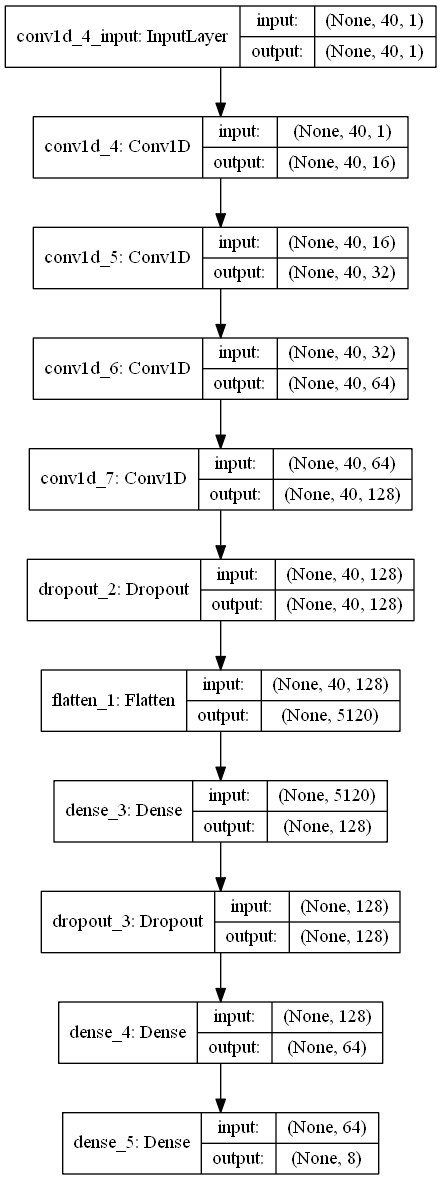

In [90]:
from keras.utils import plot_model
# Save an image of the model's architecture to a file
plot_model(CNN_model, to_file='Feed Forward NN.png', show_shapes=True, show_layer_names=True)

In [91]:
# Compile the model with the desired loss function, optimizer, and metric to optimize
CNN_model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

#la otra opcion es usar optimizar=opt de arriba

In [92]:
from keras.callbacks import ModelCheckpoint 

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
#start = datetime.now()

cnn_results = CNN_model.fit(x_traincnn, y_train_lb,
              batch_size = 64,
              epochs = 25,
              verbose = 1, #cantidad de info que de da
              validation_data = (x_testcnn, y_test_lb))

#duration = datetime.now() - start
#print("Training completed in time: ", duration)


Train on 1320 samples, validate on 330 samples
Epoch 1/25
1320/1320 [==============================] - 70s 53ms/step - loss: 1.9555 - acc: 0.2227 - val_loss: 1.8062 - val_acc: 0.2939
Epoch 2/25
1320/1320 [==============================] - 67s 51ms/step - loss: 1.6537 - acc: 0.3811 - val_loss: 1.5374 - val_acc: 0.4030
Epoch 3/25
1320/1320 [==============================] - 73s 55ms/step - loss: 1.3573 - acc: 0.4909 - val_loss: 1.2587 - val_acc: 0.5242
Epoch 4/25
1320/1320 [==============================] - 68s 51ms/step - loss: 1.1418 - acc: 0.5689 - val_loss: 1.1578 - val_acc: 0.5788
Epoch 5/25
1320/1320 [==============================] - 70s 53ms/step - loss: 0.9884 - acc: 0.6447 - val_loss: 1.1099 - val_acc: 0.5667
Epoch 6/25
1320/1320 [==============================] - 69s 52ms/step - loss: 0.8257 - acc: 0.6970 - val_loss: 1.0357 - val_acc: 0.6485
Epoch 7/25
1320/1320 [==============================] - 72s 54ms/step - loss: 0.7319 - acc: 0.7402 - val_loss: 0.9642 - val_acc: 0.6697
E

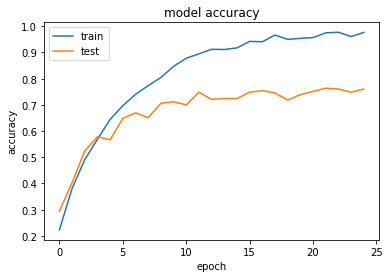

In [93]:
plt.plot(cnn_results.history['acc'])
plt.plot(cnn_results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [94]:
# Calculate pre-training accuracy 
score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

330/330 [==============================] - 0s 332us/step
Pre-training accuracy: 76.0606%


In [95]:
# Evaluating the model on the training and testing set
score = CNN_model.evaluate(x_traincnn, y_train_lb, verbose=0)
print("Training Accuracy: ", score[1])

score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9939393939393939
Testing Accuracy:  0.7606060609673009


# Add Confusion Matrix

In [96]:
import sklearn.metrics as metrics

y_pred_ohe = KerasClassifier.predict(x_traincnn)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)  # shape=(12, 12)

NameError: name 'KerasClassifier' is not defined

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [98]:
y_pred = CNN_model.predict(x_testcnn)
cm = confusion_matrix(y_train_lb, y_test_lb)

cm_display = ConfusionMatrixDisplay(cm).plot()

ValueError: Found input variables with inconsistent numbers of samples: [1320, 330]

# Save model 2

# Save CNN Model

In [99]:
from keras.models import model_from_json
# serialize model to json
json_model = CNN_model.to_json()
#save the model architecture to JSON file
with open('capstone_project_v16.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
CNN_model.save_weights('capstone_project_v16.h5')
#Model loss and accuracy
print("Saved model to disk")

Saved model to disk


In [100]:
# load json and create model
json_file = open('capstone_project_v16.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("capstone_project_v16.h5")
print("Loaded model from disk")

Loaded model from disk


In [101]:
# evaluate loaded model on test data
loaded_model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test_lb, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


ERROR (theano.gof.opt): Optimization failure due to: local_abstractconv_check
ERROR (theano.gof.opt): node: AbstractConv2d{convdim=2, border_mode='half', subsample=(1, 1), filter_flip=True, imshp=(None, 1, 40, 1), kshp=(16, 1, 5, 1), filter_dilation=(1, 1), num_groups=1, unshared=False}(InplaceDimShuffle{0,2,1,x}.0, InplaceDimShuffle{2,1,0,x}.0)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "C:\Users\diego\Anaconda3\envs\emotion_capstone\lib\site-packages\theano\gof\opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "C:\Users\diego\Anaconda3\envs\emotion_capstone\lib\site-packages\theano\tensor\nnet\opt.py", line 500, in local_abstractconv_check
    node.op.__class__.__name__)
theano.gof.opt.LocalMetaOptimizerSkipAssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the opt

LocalMetaOptimizerSkipAssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against? On the CPU we do not support float16.

In [ ]:
from keras.initializers import glorot_uniform
#Reading the model from JSON file
with open('capstone_project_v16.json', 'r') as json_file:
    json_savedModel= json_file.read()
#load the model architecture 
model_load = keras.models.model_from_json(json_savedModel)
model_load.summary()

In [ ]:
#load new model
model_load.load_weights('capstone_project_v16.h5')

In [ ]:
#Compiling the model
model_load.compile(loss = 'categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

In [ ]:
score = model_load.evaluate(x_testcnn, y_test_lb, verbose=0)

In [ ]:
preds = model_load.predict(x_testcnn, batch_size=32, verbose=1)

In [ ]:
loss,acc = model_load.evaluate(x_testcnn, y_test_lb)